In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Читање на податочното множество Data_Cortex_Nuclear кое содржи податоци за Mice Protein Expression.Множеството има 8 класи и содржи 82 атрибути и 1080 податоци

In [2]:
import pandas as pd
file = r'/content/drive/MyDrive/Data_Cortex_Nuclear.xls'
df = pd.read_excel(file)
df.head()


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

Ги тргаме првиот атрибут и последните 4(како што беше побарано во лабораториската вежба) за да може да ги користимњ само атрибутите со реални вредности

In [3]:

df = df.drop([df.columns[0], df.columns[-2], df.columns[-3], df.columns[-4]], axis = 1)
df.shape

(1080, 78)

In [4]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.1

Претворање во 2D PCA на датасетот

Бидејќи имаше NaN вредности во множеството,морав да ги отстранам за да можам да применам PCA






In [5]:

df = df.dropna(how = 'any', thresh = 70)

df = df.fillna(df.mean())
df.shape

(1077, 78)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = df.loc[:, 'DYRK1A_N':'CaNA_N']
scaler.fit(data)

data_scaled = scaler.transform(data)


In [7]:
pca = PCA(n_components = 2)
pca.fit(data_scaled)

data_pca = pca.transform(data_scaled)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_pca.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 2)


Визуелизација на 2D PCA

Explained Variance Ratio: 0.42393120986252203


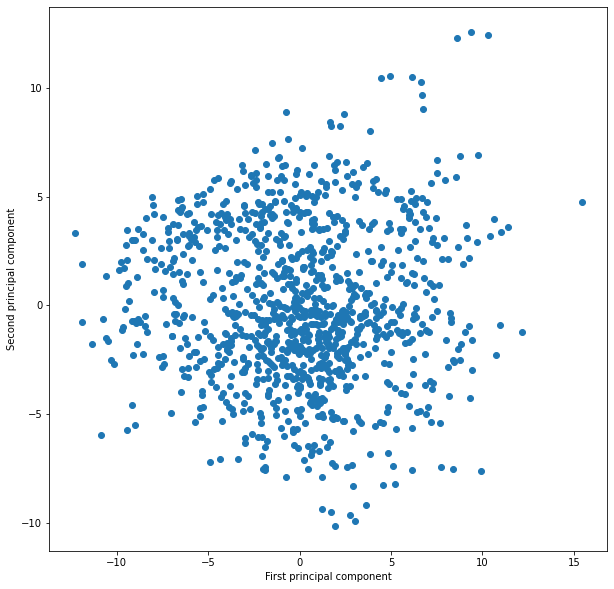

In [8]:
from matplotlib import  pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1])

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

print("Explained Variance Ratio:", pca.explained_variance_ratio_.sum())

Претворање во 3D PCA на датасетот

In [9]:

pca_3d = PCA(n_components = 3)
pca_3d.fit(data_scaled)

data_pca_3d = pca_3d.transform(data_scaled)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_pca_3d.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 3)


Визуелизација на 3D PCA

In [10]:
import plotly.express as px
dictionary = {
    'First Principal Component': data_pca_3d[:, 0], 
    'Second Principal Component': data_pca_3d[:, 1], 
    'Third Principal Component': data_pca_3d[:, 2]
}
df_pca = pd.DataFrame(dictionary)

fig = px.scatter_3d(df_pca, x='First Principal Component', y='Second Principal Component', z='Third Principal Component')
fig.show()

print("Explained Variance Ratio:", pca_3d.explained_variance_ratio_.sum())

Explained Variance Ratio: 0.5275050223065528


Сега ќе пристапиме кон методите за кластерирање.Ќе ги искористиме K-means и Хиерархиско кластерирање

In [11]:
X=data_pca

Прво ќе пробам K-means со рандом иницијализација и 8 кластери(колку што имаме класи)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'random', n_clusters = 8)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Визуелизација со TSNE

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(X)


Text(0, 0.5, 't-SNE feature 1')

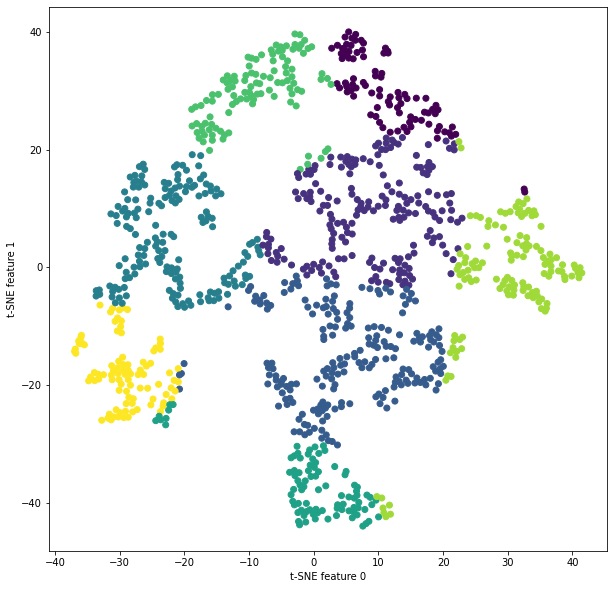

In [14]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

Подобрена верзија на к-means со к-means++ иницијализација

In [15]:
kmeans = KMeans(init = 'k-means++', n_clusters = 8, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Визуелизација со TSNE

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(X)


Text(0, 0.5, 't-SNE feature 1')

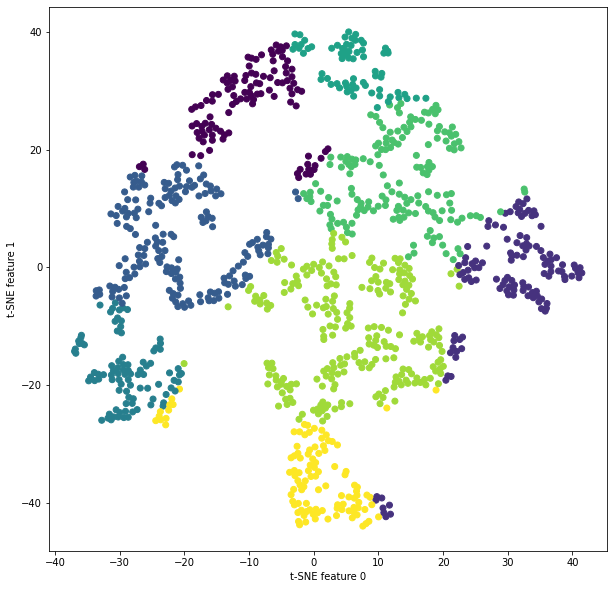

In [17]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

Следно ќе пробам хиерархиско агломеративно кластерирање

Во првиот случај имаме average linkage,односно разликата меѓу 2 кластери е разликата помеѓу нивните просечни вредности во рамките на кластерот со Евклидово растојание.(Пробав и single linkage,кое е растојанието меѓу најблиските членови на различните кластери,меѓутоа резултатите беа многу лоши,па го изоставив од финалното решение.)

In [18]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage = 'average')
y_pred = hierarchical.fit_predict(X)


Визуелизација со TSNE

Text(0, 0.5, 't-SNE feature 1')

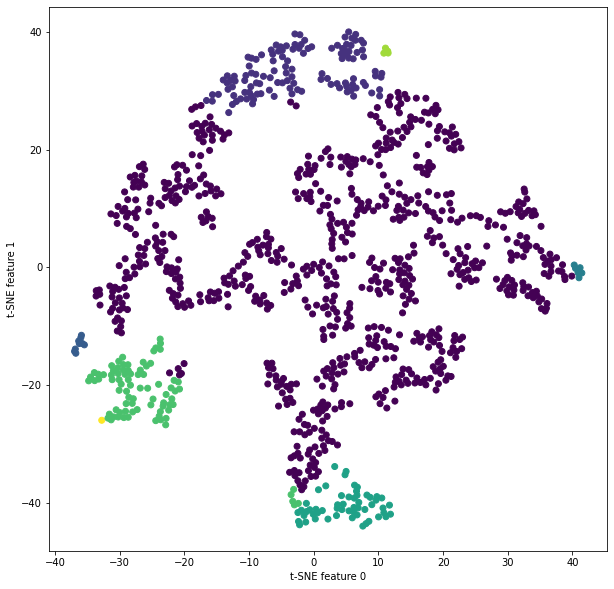

In [19]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")


Очигледно со average linkage добиваме прилично лоши резултати бидејќи имаме различни густини и членови кои се блиски,но и далечни едни од други,со што со просечното растојание завршуваат во ист кластер

Во вториот случај имаме complete linkage,односно разликата меѓу 2 кластери е разликата помеѓу нивните најдалечно членови со Евклидово растојание

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage = 'complete')
y_pred = hierarchical.fit_predict(X)

Визуелизација со TSNE

Text(0, 0.5, 't-SNE feature 1')

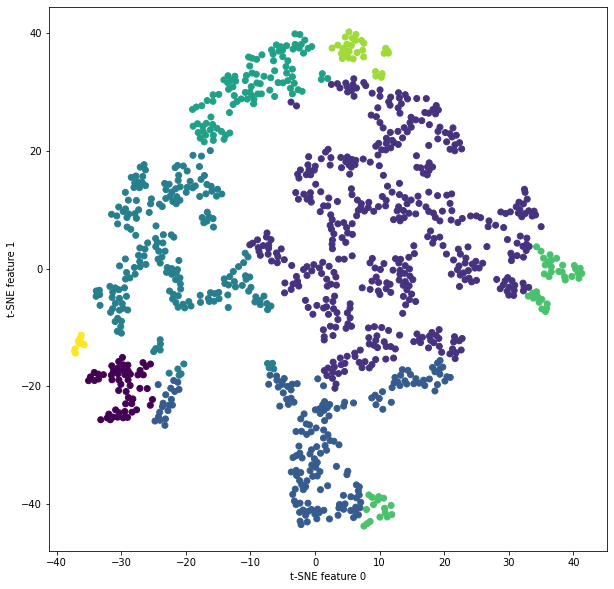

In [ ]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

Очигледно е дека со complete linkage добиваме далеку подобри резултати одошто со average linkage